<a href="https://colab.research.google.com/github/k-messick/EDA/blob/main/assignment_EDA_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

1. See file "EDA_written_answers" in folder
2. See file "EDA_written_answers" in folder
3. See file "EDA_written_answers" in folder
4. A non-decreasing transformation of the median is the median of the transformed variable. This is because the transformation does not change the order of the outcome of answers/data. The median of the transformed data is  the transformation of the original median. Given that the order of the data is not changing, this also applies to quantiles, the IQR, and the range. The transformed median, quantile, IQR, or range will be the transformation of the corresponding original variable of the median, quantile, IQR, or range.
5. Considering a non-decreasing transformation 𝑔(), it is not always true that  𝑚(𝑔(𝑋))=𝑔(𝑚(𝑋)). 𝑚(𝑔(𝑋)) represents the expected value of the variable 𝑔(𝑋). 𝑔(𝑚(𝑋)) represents the transformation of 𝑔 to the mean of 𝑋. It is the transformed value of the mean of 𝑋. These two equations are not always equal because it would need for the transformation 𝑔 to be such that the mean of the transformed values equals the transformed mean of the original values, and that is not always the case for non-decreasing transformations.

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

1.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('/content/ForeignGifts_edu.csv') # Local file

2.

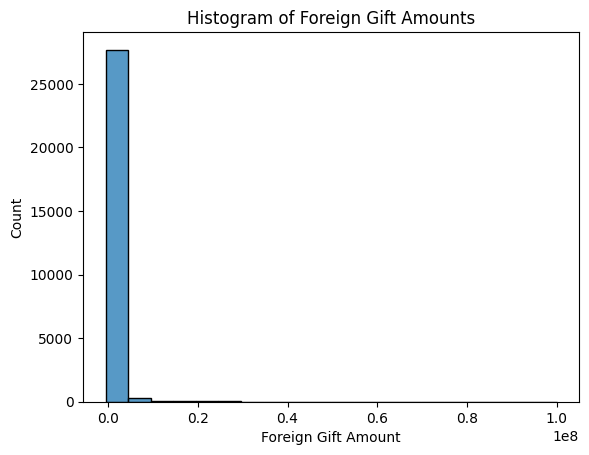

In [20]:
#Histogram of Foreign Gift Amount
sns.histplot(df['Foreign Gift Amount'], bins=20, kde=False)
plt.title("Histogram of Foreign Gift Amounts")
plt.show()

It seems that the histogram presented above is right skewed. This suggests that most gift amounts are small, and there are only a few large sums. Small is in regards to less than 1,000,000. The frequency of small gifts is also greater than large gifts based on the histogram.

3.

In [21]:
#How many of each type
gift_type=df.groupby(['Gift Type']).count()
gift_type

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Country of Giftor,Giftor Name
Gift Type,,,,,,,,,
Contract,17274,17274,17274,17274,17274,17274,17274,17274,15986
Monetary Gift,10936,10936,10936,10936,10936,10936,10936,10936,8473
Real Estate,11,11,11,11,11,11,11,11,11


In [22]:
#Proportion of type
(df.groupby(['Gift Type']).count()/len(df)) * 100

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Country of Giftor,Giftor Name
Gift Type,,,,,,,,,
Contract,61.209737,61.209737,61.209737,61.209737,61.209737,61.209737,61.209737,61.209737,56.645760
Monetary Gift,38.751285,38.751285,38.751285,38.751285,38.751285,38.751285,38.751285,38.751285,30.023741
Real Estate,0.038978,0.038978,0.038978,0.038978,0.038978,0.038978,0.038978,0.038978,0.038978


The proportion of gifts that are contracts is 61.21%. The proportion of gifts that are monetary gifts is 38.75%. The proportion of gifts that is real estate is 0.04%.

4.

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


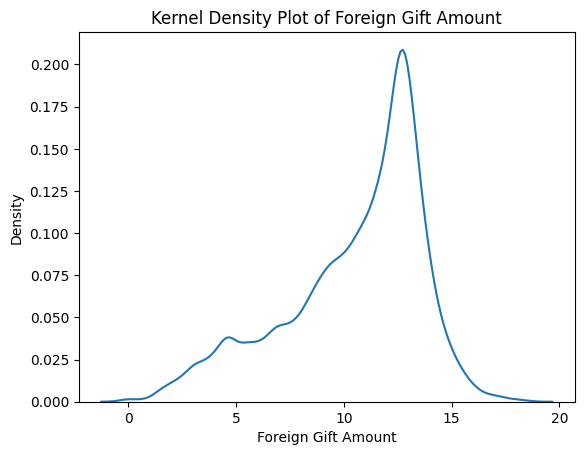

In [23]:
#Kernel density plot of the log of Foreign Gift Amount
sns.kdeplot(x=np.log(df['Foreign Gift Amount'])).set(title='Kernel Density Plot of Foreign Gift Amount')
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


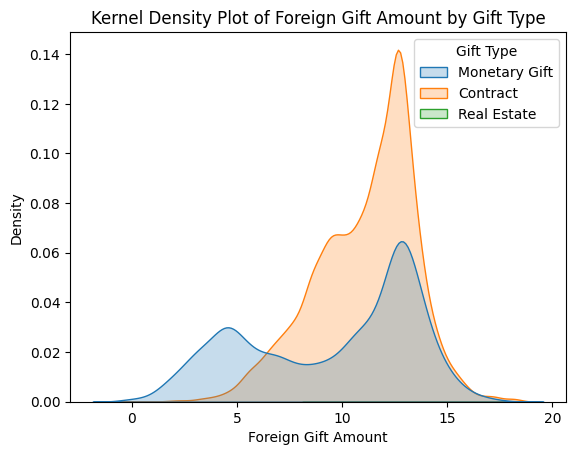

In [24]:
#Kernel density plot of the log of Foreign Gift Amount conditional on gift type
sns.kdeplot(data=df, x=np.log(df['Foreign Gift Amount']), hue='Gift Type', fill=True)
plt.title('Kernel Density Plot of Foreign Gift Amount by Gift Type')
plt.show()

Both kernal density plots follow the same outline, however the second plot breaks it down in terms of gift type. Based on these kernal density plots, it is evident that Contracts are the most common gift type. Monetary Gifts are the second most popular gift type, and Real Estate is really not common.

5.

In [42]:
#Top 15 countries in terms of the number of gifts
top_15_countries_by_gifts = df.groupby('Country of Giftor')['Gift Type'].count().sort_values(ascending=False).head(15)
top_15_countries_by_gifts

,Gift Type
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [44]:
#Top 15 countries in terms of the amount given
top_15_countries_by_given = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
top_15_countries_by_given

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


6.

In [43]:
#Top 15 instituions in terms of the amount of money received
top_15_institutions_by_received = df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
top_15_institutions_by_received


,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


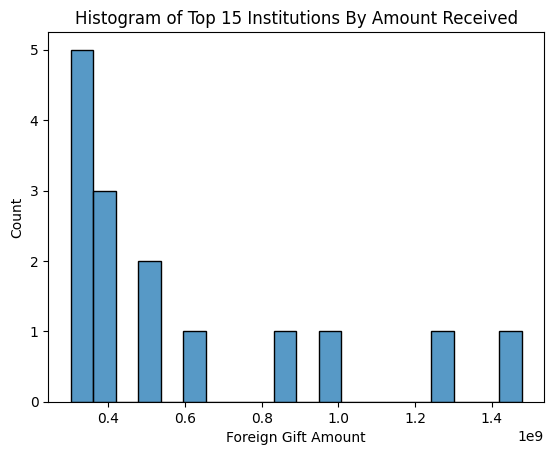

In [53]:
sns.histplot(top_15_institutions_by_received, bins=20, kde=False)
plt.title("Histogram of Top 15 Institutions By Amount Received")
plt.show()

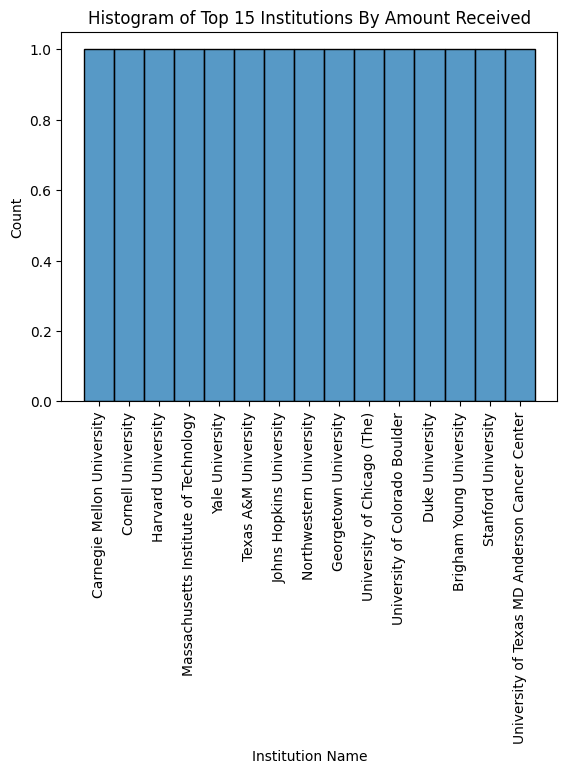

In [56]:
#Or Convert the Series to a DataFrame for sns.histplot
plot_data = top_15_institutions_by_received.reset_index()

#Plot
sns.histplot(data=plot_data, x='Institution Name', discrete=True, bins=20, kde=False)
plt.title("Histogram of Top 15 Institutions By Amount Received")
plt.xticks(rotation=90) #Rotate categories for readability
plt.show()

7.

In [35]:
top_giftors = (df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(3))
top_giftors

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215


In total, the top three giftors that provide the most money are the Qatar Foundation, the Qatar Foundation/Qata National Research Fund, and the Qata Foundation for Education.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

1.

In [3]:
df2 = pd.read_csv('/content/drilling_rigs.csv') # Local file

In [5]:
print("Number of observations:", df2.shape[0])
print("Variables included:", df2.shape[1])
print("\nData types:", df2.dtypes)

Number of observations: 623
Variables included: 10

Data types: Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                    int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                   int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                     object
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                   object
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)     object
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)    object
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)       object
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                      int64
Active Well Servic

There are 623 observations and 10 variables. Numeric variables are not read in correctly by Pandas, so some variables will have to be typecast/coerced. To clean this data in that sense, I would recommend using pd.to_numeric(df2['column_name'], errors='coerce'). Additionally it might help to drop NaN values with df2.dropna(). Lastly, standardizing formatting might be beneficial using .str.replace() to solve inconsistent characters.

2.

In [6]:
#Converting month
df2['time'] = pd.to_datetime(df2['Month'], format='mixed')
df2['time']

,time
0,1973-01-01
1,1973-02-01
2,1973-03-01
3,1973-04-01
4,1973-05-01
...,...
618,2024-07-01
619,2024-08-01
620,2024-09-01
621,2024-10-01


3.

In [7]:
df2['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(df2['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')

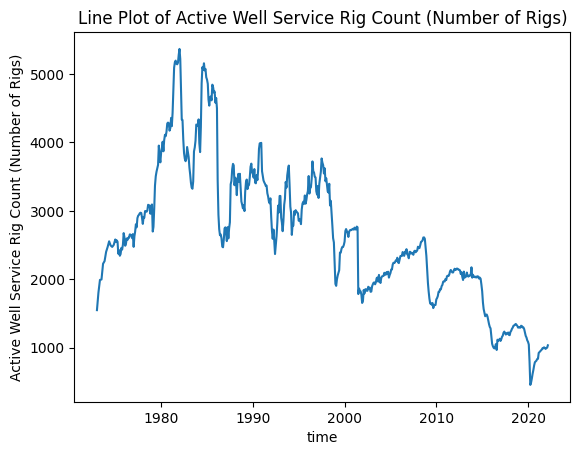

In [9]:
#Line plot of Active Well Service Rig Count
fig = sns.lineplot(data = df2, x = 'time',
                   y = 'Active Well Service Rig Count (Number of Rigs)')
fig.set(title="Line Plot of Active Well Service Rig Count (Number of Rigs)",
        xlabel='time', ylabel='Active Well Service Rig Count (Number of Rigs)')
plt.show()

It seems that overtime there is a pretty steady rate of spikes and pitfalls of active well service rigs. Amongst other factos, I would also assume this is dependent upon the age of rigs, the economy, and perhaps the number of oil rig workers.

4.

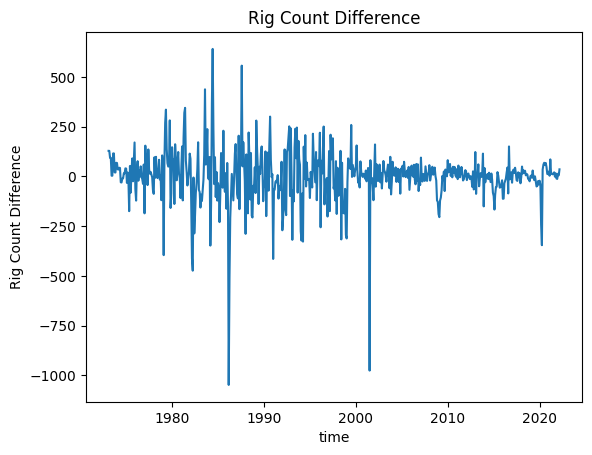

In [10]:
#Line plot of first difference of Active Well Service Rig Count (Number of Rigs)
df2['Rig Count Difference'] = df2['Active Well Service Rig Count (Number of Rigs)'].diff()
fig = sns.lineplot(data = df2, x = 'time',
                   y = 'Rig Count Difference')
fig.set(title="Rig Count Difference",
        xlabel='time', ylabel='Rig Count Difference')
plt.show()

Similar to the line plot above, there are evident spikes and pitfalls in this graph too, showing that there are time periods of increase and decreases in the rig counts. Large spikes and dips might correlate to historical events or economic impacts. An important thing to note is after the year 2000, the fluctuations in the line plot become smaller. This suggests more stablization in the difference of rig counts.

5.

In [16]:
#Melting number of onshore and offshore rigs
melted_df2 = df2.melt(id_vars=['time'],
                     value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
                                 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
                     var_name='Rig Type', value_name='Rig Count')
melted_df2.head()

,time,Rig Type,Rig Count
0,1973-01-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,1120
1,1973-02-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,1037
2,1973-03-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,959
3,1973-04-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,914
4,1973-05-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,974


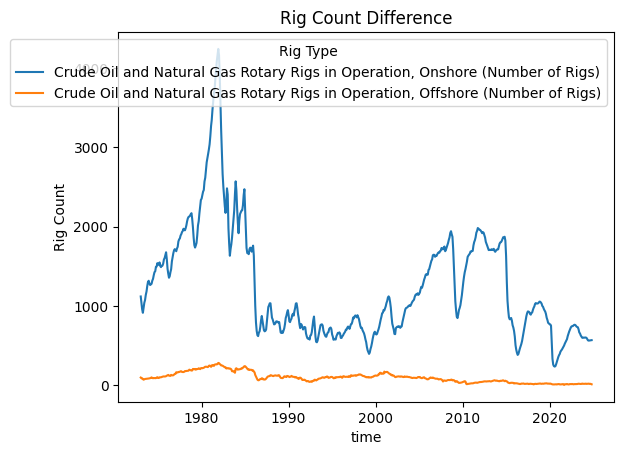

In [18]:
#Plotting the melted data
fig = sns.lineplot(data=melted_df2, x='time', y='Rig Count', hue='Rig Type')
fig.set(title="Rig Count Difference",
        xlabel='time', ylabel='Rig Count')
plt.show()